In [1]:
#RBF
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#Centers and colocation points:
eps = 0.001
xk = np.linspace(-eps,1-eps,100)
xk2 = np.linspace(eps,1+eps,100)
x = np.linspace(0,1,100)


def true_fn(x):
    return x**2 - x - np.cos(np.pi*x)


def true_dfn(x):
    return 2*x -1 + np.pi*np.sin(np.pi*x)
def true_ddfn(x):
    return 2 + np.pi**2*np.cos(np.pi*x)
def true_ifn(x):
    return x**3/3 - x**2/2 - np.sin(np.pi*x)/np.pi + 10
def true_i2fn(x):
    return x**4/12 - x**3/6 - np.cos(np.pi*x)/np.pi**2 + 10*x + 10

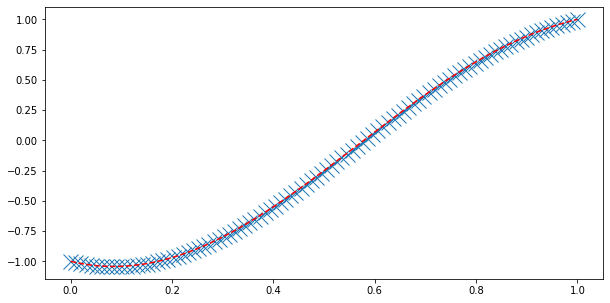

In [51]:
plt.figure(figsize=(10,5))
plt.plot(xk,true_fn(xk),'x',markersize=15)
plt.plot(x,true_fn(x),'--r')

In [52]:
(xk.reshape(-1,1))

array([[-0.001     ],
       [ 0.00910101],
       [ 0.01920202],
       [ 0.02930303],
       [ 0.03940404],
       [ 0.04950505],
       [ 0.05960606],
       [ 0.06970707],
       [ 0.07980808],
       [ 0.08990909],
       [ 0.1000101 ],
       [ 0.11011111],
       [ 0.12021212],
       [ 0.13031313],
       [ 0.14041414],
       [ 0.15051515],
       [ 0.16061616],
       [ 0.17071717],
       [ 0.18081818],
       [ 0.19091919],
       [ 0.2010202 ],
       [ 0.21112121],
       [ 0.22122222],
       [ 0.23132323],
       [ 0.24142424],
       [ 0.25152525],
       [ 0.26162626],
       [ 0.27172727],
       [ 0.28182828],
       [ 0.29192929],
       [ 0.3020303 ],
       [ 0.31213131],
       [ 0.32223232],
       [ 0.33233333],
       [ 0.34243434],
       [ 0.35253535],
       [ 0.36263636],
       [ 0.37273737],
       [ 0.38283838],
       [ 0.39293939],
       [ 0.4030404 ],
       [ 0.41314141],
       [ 0.42324242],
       [ 0.43334343],
       [ 0.44344444],
       [ 0

In [53]:
xk.reshape(1,-1)

array([[-0.001     ,  0.00910101,  0.01920202,  0.02930303,  0.03940404,
         0.04950505,  0.05960606,  0.06970707,  0.07980808,  0.08990909,
         0.1000101 ,  0.11011111,  0.12021212,  0.13031313,  0.14041414,
         0.15051515,  0.16061616,  0.17071717,  0.18081818,  0.19091919,
         0.2010202 ,  0.21112121,  0.22122222,  0.23132323,  0.24142424,
         0.25152525,  0.26162626,  0.27172727,  0.28182828,  0.29192929,
         0.3020303 ,  0.31213131,  0.32223232,  0.33233333,  0.34243434,
         0.35253535,  0.36263636,  0.37273737,  0.38283838,  0.39293939,
         0.4030404 ,  0.41314141,  0.42324242,  0.43334343,  0.44344444,
         0.45354545,  0.46364646,  0.47374747,  0.48384848,  0.49394949,
         0.50405051,  0.51415152,  0.52425253,  0.53435354,  0.54445455,
         0.55455556,  0.56465657,  0.57475758,  0.58485859,  0.5949596 ,
         0.60506061,  0.61516162,  0.62526263,  0.63536364,  0.64546465,
         0.65556566,  0.66566667,  0.67576768,  0.6

In [54]:
xk.reshape(-1,1) - xk2.reshape(1,-1)

array([[-0.002     , -0.01210101, -0.02220202, ..., -0.98179798,
        -0.99189899, -1.002     ],
       [ 0.00810101, -0.002     , -0.01210101, ..., -0.97169697,
        -0.98179798, -0.99189899],
       [ 0.01820202,  0.00810101, -0.002     , ..., -0.96159596,
        -0.97169697, -0.98179798],
       ...,
       [ 0.97779798,  0.96769697,  0.95759596, ..., -0.002     ,
        -0.01210101, -0.02220202],
       [ 0.98789899,  0.97779798,  0.96769697, ...,  0.00810101,
        -0.002     , -0.01210101],
       [ 0.998     ,  0.98789899,  0.97779798, ...,  0.01820202,
         0.00810101, -0.002     ]])

In [55]:
def euclidian_dist(x,xk):
    return np.abs(x.reshape(-1,1) - xk.reshape(1,-1))

In [56]:
def switch_function(x,xk):
    return np.abs(x.reshape(-1,1)-xk.reshape(1,-1))/(x.reshape(-1,1)-xk.reshape(1,-1))

In [57]:
def gaussian_rbf(x,xk,sigma = 2):
    return np.exp(-(sigma*euclidian_dist(x,xk))**2)

In [58]:
def gaussian_rbf_first_order(x,xk,sigma=2):
    return -2*sigma**2*euclidian_dist(x,xk)*np.exp(-(sigma*euclidian_dist(x,xk))**2)*switch_function(x,xk)

In [59]:
def gaussian_rbf_second_order(x,xk,sigma=2):
    return 2*sigma**2*np.exp(-(sigma*euclidian_dist(x,xk))**2)*(2*sigma**2*euclidian_dist(x,xk)**2-1)

In [60]:
def predict(xk,xk2,yk,x,sigma = 2):
    transformation = gaussian_rbf(xk,xk2,sigma)
    weight = np.linalg.solve(transformation,yk)
    transformation = gaussian_rbf(x,xk,sigma)
    return np.dot(transformation,weight)

In [61]:
def first_derivative(xk,xk2,yk,x,sigma = 2):
    transformation = gaussian_rbf(xk,xk2,sigma)
    weight = np.linalg.solve(transformation,yk)
    transformation = gaussian_rbf_first_order(x,xk,sigma)
    return np.dot(transformation,weight)

In [62]:
def second_derivative(xk,xk2,yk,x,sigma = 2):
    transformation = gaussian_rbf(xk,xk2,sigma)
    weight = np.linalg.solve(transformation,yk)
    transformation = gaussian_rbf_second_order(x,xk,sigma)
    return np.dot(transformation,weight)

In [63]:
def integral(xk,xk2,yk,x,sigma = 2):
    transformation = gaussian_rbf_first_order(xk,xk2,sigma)
    weight = np.linalg.solve(transformation,yk)
    transformation = gaussian_rbf(x,xk,sigma)
   
    return np.dot(transformation,weight)  - np.dot(transformation,weight)[0] + 10

In [64]:
def second_integral(xk,xk2,yk,x,sigma = 2):
    transformation = gaussian_rbf_second_order(xk,xk2,sigma)
    weight = np.linalg.solve(transformation,yk)
    transformation = gaussian_rbf(x,xk,sigma)
    return np.dot(transformation,weight) - np.dot(transformation,weight)[0] + 10 + 10*x
    
    

In [65]:
#def HarmonicOscilator(xk,xk2,yk,x,sigma = 2):
#    transformation = np.zeros([xk.shape[0]+2 , xk2.shape[0]])
#    transformation[0] = gaussian_rbf(np.zeros(1),xk2,sigma)
#    transformation[1] = gaussian_rbf_first_order(np.ones(1),xk2,sigma)
#    transformation[2,:] = gaussian_rbf_second_order(xk,xk2,sigma) + gaussian_rbf(xk,xk2,sigma)
#    weight = np.linalg.solve(transformation,yk)
#    transformation = gaussian_rbf(x,xk,sigma)
#    return np.dot(transformation,weight) - np.dot(transformation,weight)[00]  

Error : 2.394085426639473


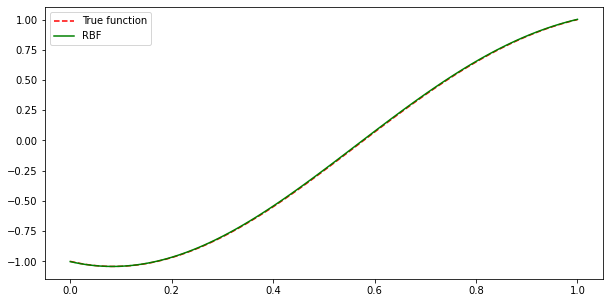

In [66]:
#Plot f(x) and the RBF approximation
plt.figure(figsize=(10,5))
plt.plot(x,true_fn(x),'--r', label = 'True function')
plt.plot(x,predict(xk,xk2,true_fn(xk),x), 'g',label = 'RBF')
print("Error :", np.mean(np.abs((true_fn(x)-predict(xk,xk2,true_fn(xk),x))/true_fn(x))) * 100 )
plt.legend()
plt.show()

Error : 2.128789251110379


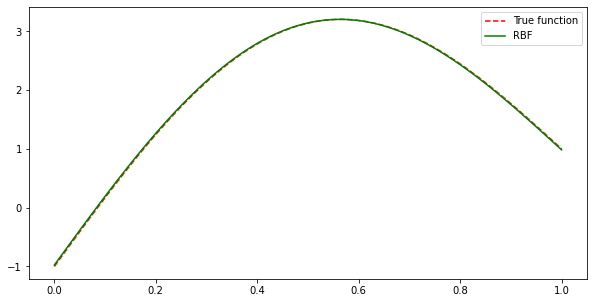

In [67]:
#Plot first derivative
plt.figure(figsize=(10,5))
plt.plot(x,true_dfn(x),'--r', label = 'True function')
plt.plot(x,first_derivative(xk,xk2,true_fn(xk),x), 'g',label = 'RBF')
print("Error :", np.mean(np.abs((true_dfn(x)-first_derivative(xk,xk2,true_fn(xk),x))/true_dfn(x))) * 100 )
plt.legend()
plt.show()

Error : 4.435334837296989


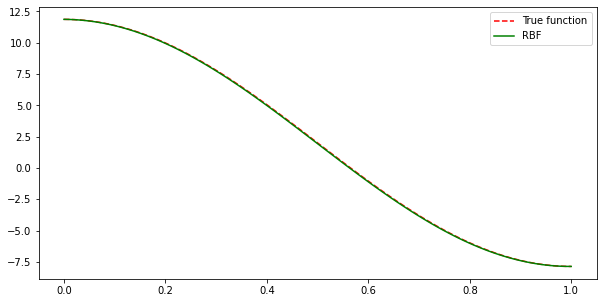

In [68]:
#Plot second derivative
plt.figure(figsize=(10,5))
plt.plot(x,true_ddfn(x),'--r', label = 'True function')
plt.plot(x,second_derivative(xk,xk2,true_fn(xk),x), 'g',label = 'RBF')
print("Error :", np.mean(np.abs((true_ddfn(x)-second_derivative(xk,xk2,true_fn(xk),x))/true_ddfn(x))) * 100 )
plt.legend()
plt.show()

Error : 0.01750943713140126


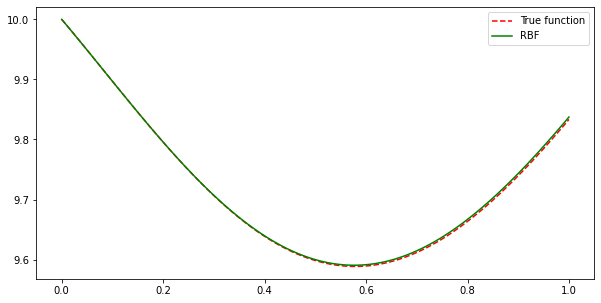

In [69]:
#Plot integral
plt.figure(figsize=(10,5))
plt.plot(x,true_ifn(x),'--r', label = 'True function')
plt.plot(x,integral(xk,xk2,true_fn(xk),x), 'g',label = 'RBF')
print("Error :", np.mean(np.abs((true_ifn(x) - integral(xk,xk2,true_fn(xk),x))/true_ifn(x))) * 100 )
plt.legend()
plt.show()

Error : 0.9132359376159624


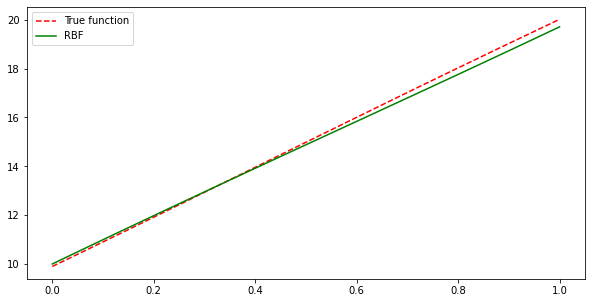

In [70]:
#Plot second integral
plt.figure(figsize=(10,5))
plt.plot(x,true_i2fn(x),'--r', label = 'True function')
plt.plot(x,second_integral(xk,xk2,true_fn(xk),x), 'g',label = 'RBF')
print("Error :", np.mean(np.abs((true_i2fn(x) - second_integral(xk,xk2,true_fn(xk),x))/true_i2fn(x))) * 100 )
plt.legend()
plt.show()